# SIT742: Modern Data Science 
**(2021 Assessment Task 01 - Data Manipulation)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension (up to 3 days) no later than *12:00pm on 16/04/2021 (Friday)*.


Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Information:** Please fill your information below

- Name:  Mirnalini Arivalagan
- Student ID:  220142881
- Email:  arivalaganm@deakin.edu.au
- Lab Session and Tutor (for on campus students): 

---

# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. As an employee for Hotel Tulip, working in the Information Technology Division, it is required to prepare a set of documentation for Team-SIT742 to allow them to understand the data being dealt with. Throughout this report, some source codes are to explore the weblog, which afterwards the information is presented to Dr Bear Guts in the format of a report.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.




## 1.  Data ETL

### 1.1 Data Loading

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib
import os
import seaborn as sns


 <div class="alert alert-block alert-info">

**Code**: 
    You are required to load Hotel TULIP data into dataframe df_ht and check how many files are loaded.
    <br>
    *Keep the outputs for code in your notebook.
</div>



1.1 Data Loading - Extract & Load Zipfiles into Data Frame

In [2]:
from zipfile import ZipFile

#Assign zip file to ZipF object
zipF = "HTWebLog_p1.zip"

#Extracting zipfile contents to subdirectory
with ZipFile (zipF, 'r') as zip:
    zip.extractall()
    files = zip.namelist() #show names of files
    print(files)
    print("The number of files in directory is " +str((len(files)))) #Count number of extracted log files

['ex061101.log', 'ex061102.log', 'ex061103.log', 'ex061104.log', 'ex061105.log', 'ex061106.log', 'ex061107.log', 'ex061108.log', 'ex061109.log', 'ex061110.log', 'ex061111.log', 'ex061112.log', 'ex061113.log', 'ex061114.log', 'ex061115.log', 'ex061116.log', 'ex061117.log', 'ex061118.log', 'ex061119.log', 'ex061120.log', 'ex061121.log', 'ex061122.log', 'ex061123.log', 'ex061124.log', 'ex061125.log', 'ex061126.log', 'ex061127.log', 'ex061128.log', 'ex061129.log', 'ex061130.log', 'ex061201.log', 'ex061202.log', 'ex061203.log', 'ex061204.log', 'ex061205.log', 'ex061206.log', 'ex061207.log', 'ex061208.log', 'ex061209.log', 'ex061210.log', 'ex061211.log', 'ex061212.log', 'ex061213.log', 'ex061214.log', 'ex061215.log', 'ex061216.log', 'ex061217.log', 'ex061218.log', 'ex061219.log', 'ex061220.log', 'ex061221.log', 'ex061222.log', 'ex061223.log', 'ex061224.log', 'ex061225.log', 'ex061226.log', 'ex061227.log', 'ex061228.log', 'ex061229.log', 'ex061230.log', 'ex061231.log', 'ex070101.log', 'ex0701

In [3]:
#Step to load log file contents into DataFrame
import pandas as pd
from glob import glob as gg

#creating empty dataframe to load log files into
df_ht = pd.DataFrame()

#creating loop to read all files with .log extension and read as cvs and then concatenate each log file into dataframe
for file in gg('*.log'):
    ht = pd.read_csv(file, encoding='iso-8859-1', 
                 comment='#', delimiter=' ', header=None, names=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username','c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status'], engine='python', skiprows=4)
    
    df_ht = pd.concat([df_ht,ht], axis=0, ignore_index=True)

#Check data frame contents


df_ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438928 entries, 0 to 8438927
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   date             object 
 1   time             object 
 2   s-sitename       object 
 3   s-ip             object 
 4   cs-method        object 
 5   cs-uri-stem      object 
 6   cs-uri-query     object 
 7   s-port           int64  
 8   cs-username      object 
 9   c-ip             object 
 10  cs(User-Agent)   object 
 11  cs(Referer)      object 
 12  sc-status        float64
 13  sc-substatus     float64
 14  sc-win32-status  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 965.8+ MB


In [4]:
df_ht.tail()

,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status
8438923,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_green...,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8438924,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_recru...,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8438925,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/images/awards.jpg,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8438926,2007-02-28,23:59:57,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/bottom.jpg,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0
8438927,2007-03-01,00:00:00,W3SVC1,127.0.0.1,GET,/Tulip/common/en-us/images/sectionbanner_accom...,-,80,-,74.110.32.161,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,http://www.hotelTulip.com.hk/Tulip/home/en-us/...,200.0,0.0,0.0


 <div class="alert alert-block alert-info">

**Code**: 
    Check the data statistics and general information by printing its top 5 rows.
    <br>
    *Keep the outputs for code in your notebook.
</div>

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.1** Please include your result for this coding task into your SIT742-DataDictionary.xlsx, then add to your report - Part I with proper section title '1.1.1' and '1.1.2'.
</div>
    </div>


1.1 Data Dictionary - check attribute data type and convert date & time

In [5]:
#Change date and time to datetime type and create new column hour based on time
df_ht['date'] = pd.to_datetime(df_ht['date'], format='%Y-%m-%d')#convert date from string to datetime object

df_ht['time'] = pd.to_datetime(df_ht['time'], format='%H:%M:%S') #convert to datetime object

df_ht['hour'] = pd.to_datetime(df_ht['time']).dt.hour #Add new hour column

df_ht #Check if data type conversion is successful

df_ht.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438928 entries, 0 to 8438927
Data columns (total 16 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   time             datetime64[ns]
 2   s-sitename       object        
 3   s-ip             object        
 4   cs-method        object        
 5   cs-uri-stem      object        
 6   cs-uri-query     object        
 7   s-port           int64         
 8   cs-username      object        
 9   c-ip             object        
 10  cs(User-Agent)   object        
 11  cs(Referer)      object        
 12  sc-status        float64       
 13  sc-substatus     float64       
 14  sc-win32-status  float64       
 15  hour             int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(9)
memory usage: 1.0+ GB


### 1.2 Data Cleaning

#### Remove all NAs from data


<div class="alert alert-block alert-warning">

**Code**: 
    1. Check which columns have NAs, <br>
    2. For each of those columns, display the number of NA records, <br> 
    3. emove all records with any NAs.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 1.2** Please include your result for this coding task into your report Part I, with proper section title '1.2'.
</div>
    </div>


1.2 Data Cleansing - Identify missing values and Remove missing values

In [6]:
df_ht = df_ht.replace("-", np.nan) #replace hyphen as null value
df_ht = df_ht.replace("None", np.nan) #replace None as null value
print(df_ht.isnull().sum()) #calculate total null values by attributes

date                     0
time                     0
s-sitename               0
s-ip                     0
cs-method                0
cs-uri-stem              0
cs-uri-query       7886532
s-port                   0
cs-username        8438928
c-ip                     0
cs(User-Agent)        3527
cs(Referer)        1309656
sc-status              756
sc-substatus           756
sc-win32-status        756
hour                     0
dtype: int64


In [7]:
#Calculcate Missing Value %
missing_values = df_ht.isin([np.nan])

percent_missing = missing_values.sum() * 100 / len(df_ht) #sum all missing value and divide by number of rows in data frame

#create new missing value data frame to review missing value percentages
missing_value_df = pd.DataFrame({'column_name': df_ht.columns,
                                 'percent_missing': percent_missing})

print(missing_value_df.round(2)) #Identify columns with missing value %

                     column_name  percent_missing
date                        date             0.00
time                        time             0.00
s-sitename            s-sitename             0.00
s-ip                        s-ip             0.00
cs-method              cs-method             0.00
cs-uri-stem          cs-uri-stem             0.00
cs-uri-query        cs-uri-query            93.45
s-port                    s-port             0.00
cs-username          cs-username           100.00
c-ip                        c-ip             0.00
cs(User-Agent)    cs(User-Agent)             0.04
cs(Referer)          cs(Referer)            15.51
sc-status              sc-status             0.01
sc-substatus        sc-substatus             0.01
sc-win32-status  sc-win32-status             0.01
hour                        hour             0.00


In [8]:
#drop columns with missing values more than 15% and load to new data frame named df_ht2

df_ht2 = pd.DataFrame(df_ht.drop(['cs-uri-query', 'cs-username', 'cs(Referer)'], axis=1))

df_ht2.info()

#Print number of rows including missing values
print("The number of all rows including NaN is " + str(len(df_ht2)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8438928 entries, 0 to 8438927
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   date             datetime64[ns]
 1   time             datetime64[ns]
 2   s-sitename       object        
 3   s-ip             object        
 4   cs-method        object        
 5   cs-uri-stem      object        
 6   s-port           int64         
 7   c-ip             object        
 8   cs(User-Agent)   object        
 9   sc-status        float64       
 10  sc-substatus     float64       
 11  sc-win32-status  float64       
 12  hour             int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usage: 837.0+ MB
The number of all rows including NaN is 8438928


In [9]:
#drop rows that contains NaNs
df_ht2 = df_ht2.dropna(axis = 0)

#Print number of rows after removing rows containing missing values
print("The number of all rows excluding NaN is " + str(len(df_ht2)))

The number of all rows excluding NaN is 8434645


## 2. Data Statistics Description

### 2.1 Traffic Analysis


<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the traffics by analysing hourly requests, then plot it into Bar Chart.
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.A** Please include your result for this coding task into your report Part I, with proper section title '2.1.A'.
</div>
    </div>


#### By day and plot 



2.1 Hourly Server Requests

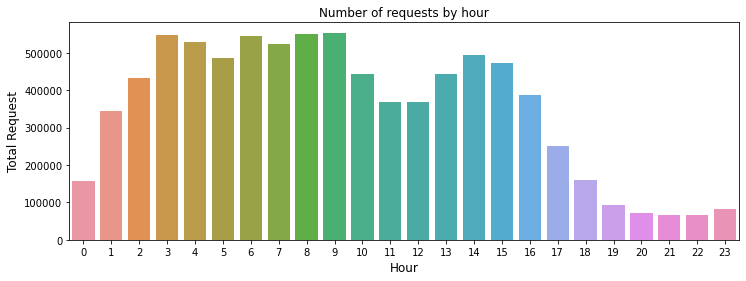

In [10]:
plt.figure(figsize=(12,4)) #Set width and height
barp = sns.countplot(data=df_ht2, x ='hour') #seaborn countplot to plot bar chart based on number of rows for each hour

plt.title('Number of requests by hour') #set plot title
plt.ylabel('Total Request', fontsize=12) #set yaxis title
plt.xlabel('Hour', fontsize=12) #set x axis title
plt.show()


<div class="alert alert-block alert-warning">

**Code**: 
    You are required to filter the hourly requests by removing any below 490,000 and above 400,000. (hourly_request_amount >= 400000 & hourly_request_amount <= 490000)    
    <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.1.B** Please include your result for this coding task into your report, with proper section title '2.1.B'.
</div>
    </div>


In [11]:
#Filter requests >=400,000 and <= 490,000

df_filter = df_ht2.groupby('hour').filter(lambda x: len(x) >=400000 and len(x) <=490000) #Filter hourly requests

df_filter.tail() #check

table = df_filter.groupby('hour')['hour'].count() #Group by hourly request of filtered results to see counts

print("Table of hours with number of requests >=400,000 and <= 490,000")
print(table) #filtered hourly requests summarized

Table of hours with number of requests >=400,000 and <= 490,000
hour
2     432289
5     487306
10    443413
13    442414
15    472843
Name: hour, dtype: int64


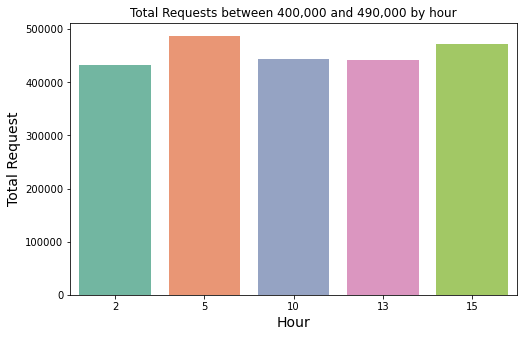

In [12]:
#plot bar chart for filtered requests
plt.figure(figsize=(8,5))#Set width and height
barp2 = sns.countplot(data=df_filter, x ='hour',palette="Set2")

plt.title('Total Requests between 400,000 and 490,000 by hour')
plt.ylabel('Total Request', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.show()

### 2.2 Server Analysis

<div class="alert alert-block alert-warning">

**Code**: 
    Discover on the server status using 'sc-status' from DataFrame, then plot it into Pie Chart. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.2** Please include your results for this coding task into your report Part I section '2.2', <br>
    1. How many types of status reported? <br>
    2. Figure 'Server Status' in pie chart. <br>
</div>

#### Server Status

2.2 Server Status Analysis

In [13]:
#Server status analysis
table2 = df_ht2.groupby('sc-status')['sc-status'].count() #Group by hourly request of filtered results to see counts

table2.sort_values(ascending= False) #counts by sc-status sorted from largest to smallest

sc-status
200.0    6071931
304.0    2136775
404.0     142578
206.0      72469
302.0       7366
500.0       2013
403.0        700
301.0        433
400.0        210
501.0        113
406.0         54
416.0          3
Name: sc-status, dtype: int64

Text(0.5, 1.0, 'SC-Status Summary')

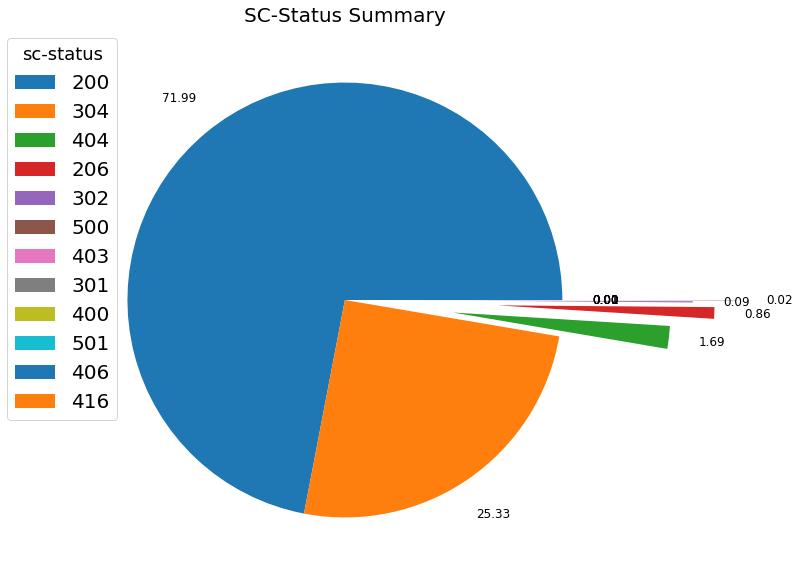

In [14]:
#plot sc-status pie chart
labels = [200,304,404,206,302,500,403,301,400,501,406,416] #assign labels based on table above

explode = [0,0,0.5,0.7,0.6,0.8,0,0,0,0,0,0]

df_ht2['sc-status'].value_counts().plot(kind="pie", figsize=(10,10), autopct='%.2f',textprops={'fontsize': 12}, 
                                labels=None, pctdistance=1.2, explode=explode) #plot pie chart based on the number of instances of each sc-status type
plt.ylabel("")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(labels, loc="upper right", title='sc-status', bbox_to_anchor=(0.1,1), fontsize=20, title_fontsize=18)#add and format legend position
plt.title("SC-Status Summary", fontsize=20)

### 2.3 Geographic Analysis

Clinet's IP addresses can reflect geographic information. Since different IP are from different countries even citys, we can find out the demographics information from them. You may use **DbIpCity** from **ip2geotools** to find the geolocation information from given IPs.

**Notes:**
There are some attributes in ip2geotools can help: <br>
*ip_address*: IP address <br>
*city*: city where IP address is located <br>
*region*: region where IP address is located <br>
*country*: country where IP address is located (two letters country code) <br>

#### 2.3.A Requests by Country
<div class="alert alert-block alert-warning">

**Code**: 
    Build your code with the following requirements <br>
    1. Select all requests at 01 Jan 2007 from 20:00:00 pm to 20:59:59. <br>
    2. Discover on the demographics by analysing requests from country level. <br>
    3. Plot countries of all requests in pie chart. <br>
    4. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.A** Please include your results for this coding task into your report Part I section '2.3.A', <br>
    1. How many requests raised in the period of time? <br>
    2. How many countries are invlolved? <br>
    3. Figure 'Request by Country' in pie chart. <br>
    4. top 3 countries with request numbers. <br>
</div>

In [15]:
!pip install ip2geotools

from ip2geotools.databases.noncommercial import DbIpCity

  Using cached ip2geotools-0.1.5-py3-none-any.whl (16 kB)
  Using cached geocoder-1.38.1-py2.py3-none-any.whl (98 kB)
  Using cached pyquery-1.4.3-py3-none-any.whl (22 kB)
  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)
  Using cached typed_ast-1.4.3-cp38-cp38-win_amd64.whl (158 kB)
Processing c:\users\mirna\appdata\local\pip\cache\wheels\5e\5d\01\3083e091b57809dad979ea543def62d9d878950e3e74f0c930\typing-3.7.4.3-py3-none-any.whl
  Using cached IP2Location-8.5.1-py3-none-any.whl (9.1 kB)
Processing c:\users\mirna\appdata\local\pip\cache\wheels\6c\32\1d\09f338b837cdbb71f8889b866d50db3e0eaa02b8fc2be4c943\dicttoxml-1.7.4-py3-none-any.whl
Processing c:\users\mirna\appdata\local\pip\cache\wheels\33\3d\d8\ba39935b88eb6efd147b53e284d391bb7ad159979db3c0f960\maxminddb-2.0.3-py2.py3-none-any.whl
  Using cached geoip2-4.1.0-py2.py3-none-any.whl (25 kB)
  Using cached ratelim-0.1.6-py2.py3-none-any.whl (4.0 kB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Using cached

In [16]:
#Filter dataframe - 1.01.2007 & hour =20

df_ht3 = df_ht2[(df_ht2["date"] == "2007-01-01") & (df_ht2["hour"] == 20)]

print("The number of requests is made on 1st Jan 2007 between 8pm to 8.59pm is  " + str(len(df_ht3))) #print the number of requests

The number of requests is made on 1st Jan 2007 between 8pm to 8.59pm is  214


In [17]:
#use ip address and locate country using DbIpCity package and add country as new column to data frame
df_ht3['country'] = df_ht3.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').country, axis=1) 

df_ht3.head()#check data country column in data frame

<ipython-input-17-c197ab4b6ffa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ht3['country'] = df_ht3.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').country, axis=1)


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status,hour,country
4770433,2007-01-01,1900-01-01 20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0,20,HK
4770434,2007-01-01,1900-01-01 20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0,20,HK
4770435,2007-01-01,1900-01-01 20:01:12,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/HarbourViewRoom02.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,20,IT
4770436,2007-01-01,1900-01-01 20:01:48,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SkyLounge01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,20,IT
4770437,2007-01-01,1900-01-01 20:01:57,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SuperiorRoom01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,20,IT


In [18]:
df_ht3['country'].value_counts(ascending=False) #Print and sort country requests


HK    169
CN     25
US     16
IT      3
AU      1
Name: country, dtype: int64

In [19]:
print("Top 3 Countries")
df_ht3['country'].value_counts(ascending=False).head(3) #Top3 countries



Top 3 Countries


HK    169
CN     25
US     16
Name: country, dtype: int64

Text(0.5, 1.0, 'Requests by Country')

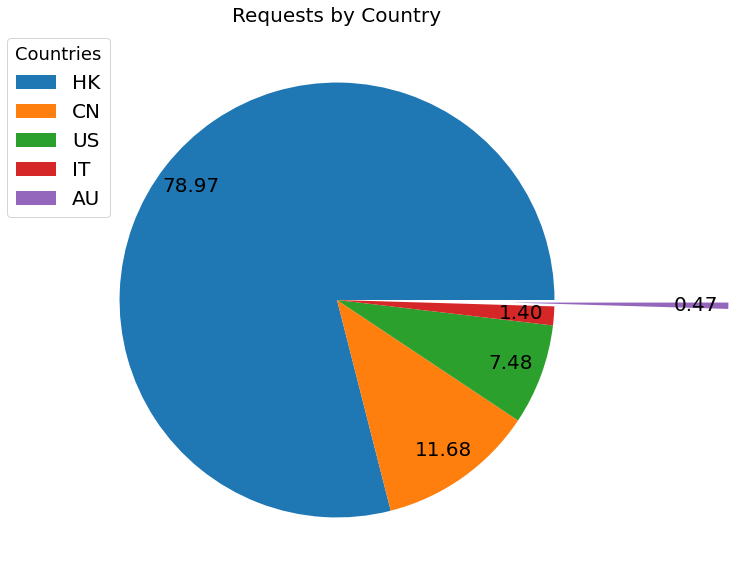

In [20]:
#plot pie chart for requests by country

country = ['HK', 'CN', 'US', 'IT', 'AU'] #Assign labels

cexplode = [0,0,0,0,0.8]
df_ht3['country'].value_counts().plot(kind="pie",figsize=(10,10),autopct='%.2f',textprops={'fontsize': 20}, 
                                   legend = True, labels=None, pctdistance=0.85, explode=cexplode)  #Plot pie chart by country



plt.ylabel("")
plt.legend(country, loc="upper right", title='Countries', bbox_to_anchor=(0.1,1), fontsize=20, title_fontsize=18)
plt.title("Requests by Country", fontsize=20)

#### 2.3.B Requests by City
<div class="alert alert-block alert-warning">

**Code**: 
    Using the selected requests from 2.3.A and build your code with the following requirements <br>
    1. Discover on the demographics by analysing requests from city level. <br>
    2. Plot cities of all requests in pie chart. <br>
    3. List top 3 with the numbers of requests. <br>
    *Keep the outputs for code in your notebook.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part I 2.3.B** Please include your results for this coding task into your report Part I section '2.3.B', <br>
    1. How many cites are invlolved? <br>
    2. Figure 'Request by City' in pie chart. <br>
    3. Top 3 cities with request numbers. <br>
</div>

In [21]:
#use ip address and locate city using DbIpCity package and add city as new column to data frame
df_ht3['city'] = df_ht3.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').city, axis=1) 

df_ht3.head() #check to see city column is added


<ipython-input-21-80f6a29a74f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ht3['city'] = df_ht3.apply(lambda row: DbIpCity.get(row['c-ip'], api_key='free').city, axis=1)


,date,time,s-sitename,s-ip,cs-method,cs-uri-stem,s-port,c-ip,cs(User-Agent),sc-status,sc-substatus,sc-win32-status,hour,country,city
4770433,2007-01-01,1900-01-01 20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/home/en-us/home_index.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0,20,HK,Hong Kong
4770434,2007-01-01,1900-01-01 20:00:00,W3SVC1,127.0.0.1,GET,/Tulip/common/common_style.aspx,80,210.184.71.81,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200.0,0.0,0.0,20,HK,Hong Kong
4770435,2007-01-01,1900-01-01 20:01:12,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/HarbourViewRoom02.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,20,IT,Valcanneto
4770436,2007-01-01,1900-01-01 20:01:48,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SkyLounge01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,20,IT,Valcanneto
4770437,2007-01-01,1900-01-01 20:01:57,W3SVC1,127.0.0.1,GET,/Tulip/aboutus/en-us/photo/SuperiorRoom01.jpg,80,62.211.200.146,Mozilla/5.0+(X11;+U;+Linux+i686;+en-US;+rv:1.8...,200.0,0.0,0.0,20,IT,Valcanneto


In [22]:
df_ht3['city'].value_counts(ascending=False) #Print and sort city

Ha Kwai Chung                         166
Beijing                                15
New York                               14
Jinrongjie (Xicheng District)           9
Valcanneto                              3
Hong Kong                               2
Quarry Bay                              1
Mountain View                           1
San Francisco (Financial District)      1
Hangzhou                                1
Sydney                                  1
Name: city, dtype: int64

In [23]:
print("Top 3 Cities")
df_ht3['city'].value_counts(ascending=False).head(3) #Top 3 cities

Top 3 Cities


Ha Kwai Chung    166
Beijing           15
New York          14
Name: city, dtype: int64

Text(0.5, 1.0, 'Requests by City')

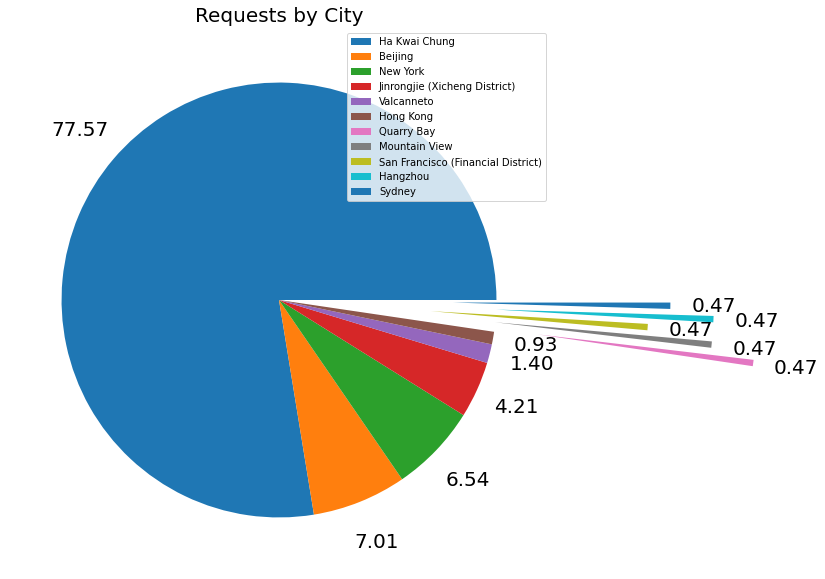

In [24]:
#plot pie chart for requests by city 

ciexplode = [0,0,0,0,0,0,1.2,1.0,0.7,1.0,0.8]
df_ht3['city'].value_counts().plot(kind="pie",figsize=(10,10),autopct='%.2f',textprops={'fontsize': 20}, 
                                  legend=True, pctdistance=1.2, labels=None, explode=ciexplode)
                                                     

plt.ylabel("")

plt.title("Requests by City", fontsize=20)


# Part II - Web Crawling

## Overview
To better introduce all the professors including the emeritus professor, the professor and also associate professor in Deakin University School of IT, faculty will need to know all the citation information on all professors. Google Scholar is a web search engine that freely indexes the metadata of articles on many authors. Majority of the professors choose to use google scholar to track their publications and research works. Therefore,  the web crawling on google scholar will be able to have the citation information obtained across all the professors (who have the google scholar profile).


## 3. Professor List Generation

### 3.1 Import and install web crawling library. 

<div class="alert alert-block alert-warning">

**Code**: 
    Import and install your web crawling library here. 
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.1** Please include your result for this coding task into your report Part II, with proper section title '3.1'.
</div>

*hint: you could use selenium by doing the pip install selenium, download the webdriver for chromedriver and define your webdriver for crawling. But you are free to use any other library*



In [25]:
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests 




### 3.2 Find all professors in School of IT and save it as csv. 

<div class="alert alert-block alert-warning">

**Code**: 
    Find all professors in Schoolf of IT and save it as csv. The csv must have the full name of the professor (in one column), the title of the professor and University Name.
</div> 

<div class="alert alert-block alert-warning">
    
**Report**: 
    **Part II 3.2** Please include your result for this coding task into your report Part II, with proper section title '3.2'.
</div>



*hint: the url of the staff list for school of IT is https://www.deakin.edu.au/information-technology/staff-listing. you may need to iteratively find out html tag by table in the page to start crawl all the text from td (td is the elements in html table, check https://www.w3schools.com/html/html_tables.asp)*

In [26]:
url = 'https://www.deakin.edu.au/information-technology/staff-listing' #assign website to variable URL

req = requests.get(url) #use requests function to call and access URL

soup = BeautifulSoup(req.text, 'lxml') #assign request from URL request as text to variable soup

tables = soup.select('table') #locate all tables from web scrape results

SIT_df =[] #create empty dataframe to add web scraping results

for i in tables:
    SIT_df.append(pd.concat(pd.read_html(i.prettify())))
    
SIT = pd.concat(SIT_df)

In [27]:
SIT #check data frame content

,Name
0,Emeritus Professor Lynn Batten
1,Emeritus Professor Andrzej Goscinski
0,Professor Jemal Abawajy
1,Professor Maia Angelova
2,Professor Gleb Beliakov
...,...
2,Jesse Mcmeikan
3,Thuy Nguyen
4,Michelle Yu
0,Nghia Dang


In [28]:
SIT = SIT['Name'].str.extract(r'(.*Professor)?\s?(.+)') #extract anything before and including professor substring from string variable

SIT.rename({0:'Title', 1:'Name'}, axis=1, inplace=True) #ammend data frame to edit headers

SIT['University'] = 'Deakin University' #append data frame with new column named University populated with Deakin University as value

In [29]:
SIT.head(10)#check titles have been extracted from name and new columns added

,Title,Name,University
0,Emeritus Professor,Lynn Batten,Deakin University
1,Emeritus Professor,Andrzej Goscinski,Deakin University
0,Professor,Jemal Abawajy,Deakin University
1,Professor,Maia Angelova,Deakin University
2,Professor,Gleb Beliakov,Deakin University
3,Professor,Terry Caelli,Deakin University
4,Professor,Jinho Choi,Deakin University
5,Professor,Chang-Tsun Li,Deakin University
6,Professor,Robin Doss,Deakin University
7,Professor,Peter Eklund,Deakin University


In [30]:
#filter dataframe to only include individuals that are either Emeritus Professor, Professor or Associate Professor
SIT = SIT[(SIT['Title'] == "Emeritus Professor") |(SIT['Title'] == "Professor") | (SIT['Title'] == "Associate Professor")]

In [31]:
SIT.to_csv('Professor-list.csv', index=False) #export data frame to csv